In [6]:
import statistics
import random as rd

def single_game(num_players):
    ladder = {1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85}
    snakes = {24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70}
    board = [x for x in range(1, 91)]

    pos = [0] * num_players
    num_moves = 0
    winner = False
    while not winner:
        for player in range(num_players):
            roll = rd.randint(1, 6)
            pos[player] += roll

            for (key1, value1), (key2, value2) in zip(ladder.items(),
                                                      snakes.items()):
                if pos[player] == key1:
                    pos[player] = value1
                elif pos[player] == key2:
                    pos[player] = value2
                else:
                    continue
            if pos[player] >= len(board):
                winner = True
        num_moves += 1
    return num_moves


def multiple_games(num_games, num_players):
    num_moves = []
    for i in range(num_games):
        num_moves.append(single_game(num_players))
    return num_moves


def multi_game_experiment(num_games, num_players, seed):
    rd.seed(seed)
    games_with_seed = multiple_games(num_games, num_players)
    return games_with_seed

Text(0, 0.5, 'Occurences')

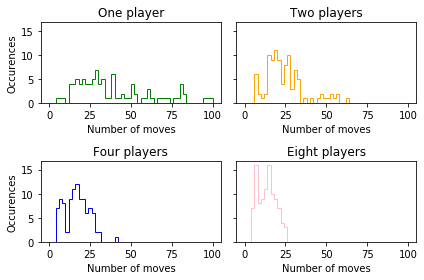

In [5]:
import matplotlib.pyplot as plt

n = 50 
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

x1 = multi_game_experiment(100, 1, 5)
x2 = multi_game_experiment(100, 2, 5)
x3 = multi_game_experiment(100, 4, 5)
x4 = multi_game_experiment(100, 8, 5)

axs[0,0].hist(x1, bins=n, histtype = 'step', color='green', range=(0,100))
axs[0,1].hist(x2, bins=n, histtype = 'step', color='orange', range=(0,100))
axs[1,0].hist(x3, bins=n, histtype = 'step', color='blue', range=(0,100))
axs[1,1].hist(x4, bins=n, histtype = 'step', color='pink', range=(0,100))

axs[0,0].set_title('One player')
axs[0,1].set_title('Two players')
axs[1,0].set_title('Four players')
axs[1,1].set_title('Eight players')

axs[0,0].set_xlabel('Number of moves')
axs[0,1].set_xlabel('Number of moves')
axs[1,0].set_xlabel('Number of moves')
axs[1,1].set_xlabel('Number of moves')

axs[0,0].set_ylabel('Occurences')
axs[1,0].set_ylabel('Occurences')